<a href="https://colab.research.google.com/github/shivansh9770/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Importing important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
import warnings
warnings.filterwarnings('ignore')

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing sales data as Sales_df**

In [ ]:
sales_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT REGRESSION/Rossmann Stores Data.csv')

**Exploring data in sales_df**

In [ ]:
sales_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
sales_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
print('NO of rows = '+ str(sales_df.shape[0]))
print('NO of columns = '+ str(sales_df.shape[1]))

NO of rows = 1017209
NO of columns = 9


In [ ]:
# exploring Target variable (Sales)
sales_df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

Sales is continuous variable 

In [ ]:
#seeing value count of open
sales_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

We could see in **open** column there are **0** values when stores were **closed** and they are of **no use** to predict sales.

Now deleting rows from the column Open which have value 0 because when store is closed no sales could be done

In [ ]:
sales_df.drop(sales_df.index[sales_df['Open'] == 0], inplace = True)

Now lets delete the column open because all rows contains (open=1) now




In [ ]:
sales_df.drop(columns=['Open'],inplace=True)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


All the columns are int type except Date and State Holiday and there are no null values

Date and StateHoliday are object type so lets explore this columns

In [ ]:
#let us see value counts of StateHoliday 
sales_df['StateHoliday'].value_counts()

0    731342
0    112140
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

We could see StateHoliday is showing 0 two times means it  would also be in string type

In [ ]:
#let us check
sales_df[sales_df['StateHoliday']=='0'].head(4)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1


We found '0' is stored as string so lets convert

In [ ]:
#let us convert '0' to 0
sales_df['StateHoliday'][sales_df['StateHoliday']=='0']=0

In [ ]:
sales_df['StateHoliday'].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

We could see state holidays are categorical we should convert into numerical

Now we can see State Holiday has values(0,a,b,c)
lets do one hot coding on this to make separate column for each 

In [ ]:
sales_df = pd.get_dummies(sales_df, columns=["StateHoliday"],drop_first=True)

In [ ]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,1,1,0,0
1016827,733,2,2013-01-01,10765,2377,0,1,1,0,0
1016863,769,2,2013-01-01,5035,1248,0,1,1,0,0
1017042,948,2,2013-01-01,4491,1039,0,1,1,0,0


In [ ]:
# let us see value counts of date
sales_df['Date'].value_counts()

2014-04-16    1115
2015-01-13    1115
2015-02-11    1115
2015-02-10    1115
2015-02-09    1115
              ... 
2014-12-14      16
2014-11-23      16
2014-11-16      16
2014-12-25      16
2013-03-29      16
Name: Date, Length: 942, dtype: int64

As seen above date column is of object type, so converted it into datetime. 

In [ ]:
# converting Date from object to datetype 
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

Extracting date, month, year from date column and creating new columns for each because our modal cant take date as input

In [ ]:
sales_df['date'] = pd.DatetimeIndex(sales_df['Date']).day
sales_df['month'] = pd.DatetimeIndex(sales_df['Date']).month
sales_df['year'] = pd.DatetimeIndex(sales_df['Date']).year

Now **removing Date column** from datase because we can't use date in modeling

In [ ]:
sales_df.drop(columns=['Date'],axis=1,inplace=True)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Store           844392 non-null  int64
 1   DayOfWeek       844392 non-null  int64
 2   Sales           844392 non-null  int64
 3   Customers       844392 non-null  int64
 4   Promo           844392 non-null  int64
 5   SchoolHoliday   844392 non-null  int64
 6   StateHoliday_a  844392 non-null  uint8
 7   StateHoliday_b  844392 non-null  uint8
 8   StateHoliday_c  844392 non-null  uint8
 9   date            844392 non-null  int64
 10  month           844392 non-null  int64
 11  year            844392 non-null  int64
dtypes: int64(9), uint8(3)
memory usage: 66.8 MB


In [ ]:
sales_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,month,year
0,1,5,5263,555,1,1,0,0,0,31,7,2015
1,2,5,6064,625,1,1,0,0,0,31,7,2015
2,3,5,8314,821,1,1,0,0,0,31,7,2015
3,4,5,13995,1498,1,1,0,0,0,31,7,2015
4,5,5,4822,559,1,1,0,0,0,31,7,2015


Describing sales_dF

In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,month,year
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580,0.000822,0.000172,0.000084,15.835683,5.845738,2013.831937
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103,0.028657,0.013103,0.009169,8.683456,3.323931,0.777260
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2013.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,6.000000,2014.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,0.000000,0.000000,0.000000,23.000000,8.000000,2014.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2015.000000


Lets see distribution of data in sales_df

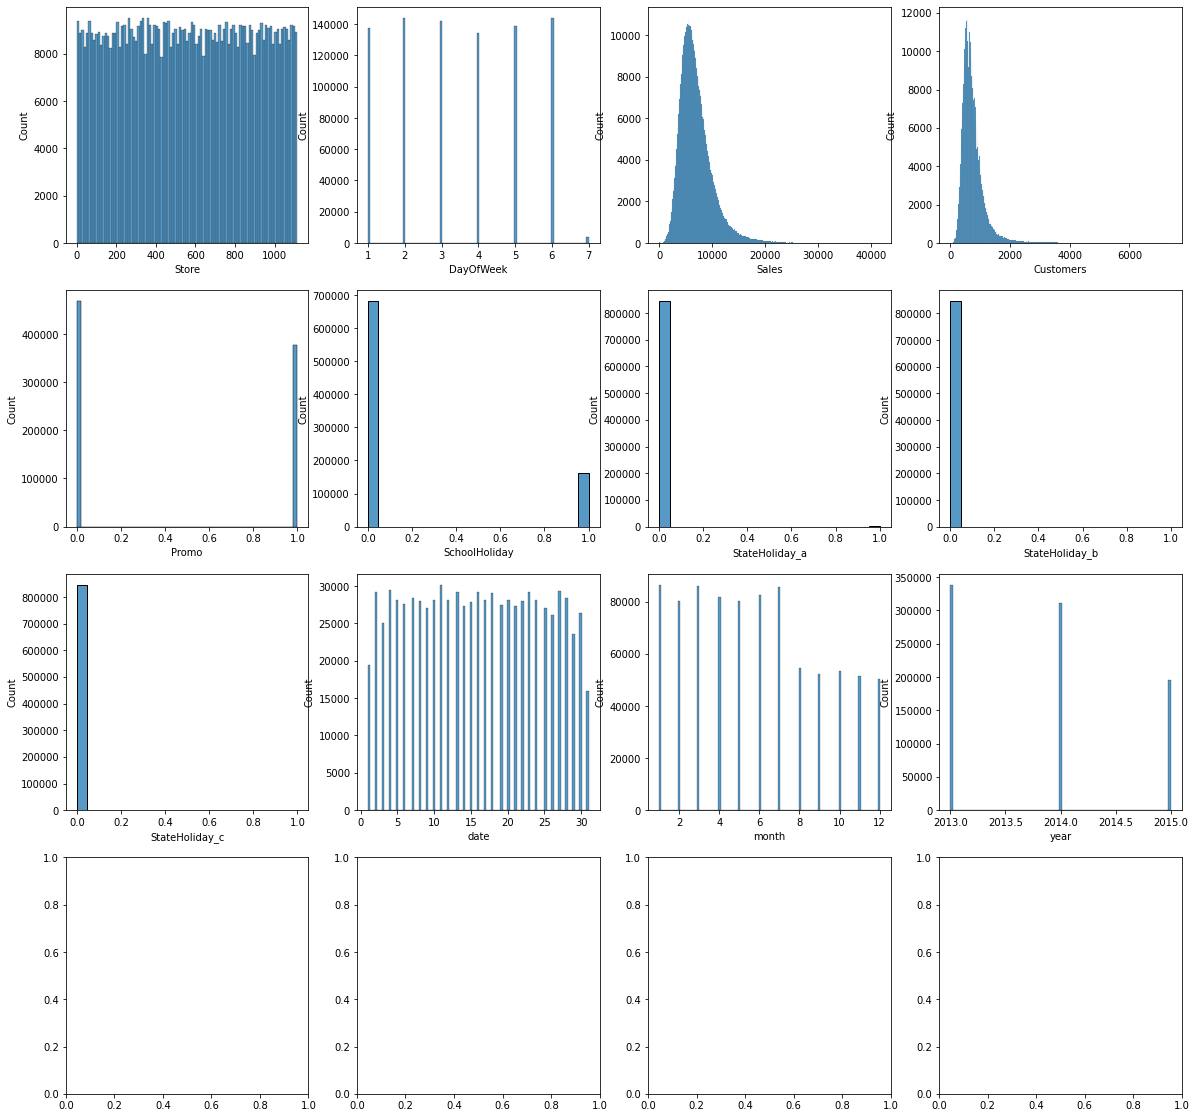

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(sales_df.describe().columns):
 sns.histplot(sales_df[col],ax=axes[i//4,i%4])

In [ ]:
sales_df['StateHoliday_a'].value_counts()

0    843698
1       694
Name: StateHoliday_a, dtype: int64

In [ ]:
sales_df['StateHoliday_b'].value_counts()

0    844247
1       145
Name: StateHoliday_b, dtype: int64

In [ ]:
sales_df['StateHoliday_c'].value_counts()

0    844321
1        71
Name: StateHoliday_c, dtype: int64

**we could see from distribution:**
1. 7th day count is way lesser than other days
2. State holidays are very less
3. Promo is used many days
4. Count of first 7 months are more than last 5 months
5. count(2013>2014>2015) 

Lets see some **sales trend**

**yearly average sales**

In [ ]:
#seeing yearly average sales
sales_df.groupby('year')['Sales'].mean()

year
2013    6814.392025
2014    7025.404201
2015    7088.126648
Name: Sales, dtype: float64

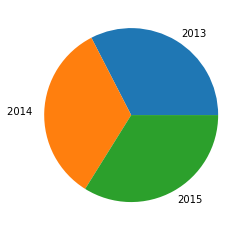

In [ ]:
mylabels = ["2013", "2014 ", "2015"]
plt.pie(sales_df.groupby('year')['Sales'].mean(),labels=mylabels)
plt.show()

average sales(2015>2014>2013)
But not varying much with year

**Monthly average sales**

In [ ]:
sales_df.groupby('month')['Sales'].mean()

month
1     6563.690444
2     6589.165535
3     6976.412026
4     7046.228420
5     7106.453154
6     7000.978190
7     6952.682125
8     6648.984654
9     6546.343035
10    6602.843354
11    7188.554250
12    8608.956661
Name: Sales, dtype: float64

Monthly average sales also not varying much .

only **12th month** is showing exceptionally high sales

**Average sales date wise**

In [ ]:
sales_df.groupby('date')['Sales'].mean()

date
1     8053.674102
2     7987.452335
3     7765.296991
4     7745.844134
5     7554.982112
6     7149.914351
7     7101.113826
8     6785.121061
9     6499.276895
10    6429.182961
11    6087.881843
12    6186.034047
13    6570.115406
14    6606.648700
15    7018.545523
16    7314.079684
17    7283.898949
18    7340.267275
19    7115.279322
20    6955.004553
21    6693.696159
22    6544.690081
23    6498.037037
24    5915.626283
25    5967.839608
26    6189.771018
27    6636.996208
28    6943.025241
29    7512.799109
30    8354.463914
31    7577.234928
Name: Sales, dtype: float64

**Average sales on state holidays**

In [ ]:
#sales on state holiday
sales_df.groupby(['StateHoliday_a','StateHoliday_b','StateHoliday_c'])['Sales'].mean()

StateHoliday_a  StateHoliday_b  StateHoliday_c
0               0               0                 6953.515034
                                1                 9743.746479
                1               0                 9887.889655
1               0               0                 8487.471182
Name: Sales, dtype: float64

We could see average **sales** on **state holidays are more** than non state holidays.

avg sales**(StateHoliday_b>StateHoliday_a>StateHoliday_c)**

**Average Sales by DayOFWeek**

In [ ]:
sales_df.groupby(['DayOfWeek'])['Sales'].mean()

DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64

We could see average sales on some DayOfWeek is more than others.

**Maximum** average sales are on **(day7 > day1 > day2 > day5)**

**Lets see average sales on school holiday vs Non school holiday**

In [ ]:
sales_df.groupby(['SchoolHoliday'])['Sales'].mean()

SchoolHoliday
0    6896.782411
1    7200.181650
Name: Sales, dtype: float64

We could see on school holidays average sales is more than on normal day

**Lets see average sales with and without promo**

In [ ]:
sales_df.groupby(['Promo'])['Sales'].mean()

Promo
0    5929.407603
1    8228.281239
Name: Sales, dtype: float64

we could see with Promo sales is **variying**.

**with promo** average **sales** is **more** than without promo

<!-- ***We could remove date,year and month*** -->

In [ ]:
sales_df.head(3)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,month,year
0,1,5,5263,555,1,1,0,0,0,31,7,2015
1,2,5,6064,625,1,1,0,0,0,31,7,2015
2,3,5,8314,821,1,1,0,0,0,31,7,2015


Lets see our other suplementary table Store 

In [ ]:
store_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT REGRESSION/store.csv')

In [ ]:
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
print('NO of rows = '+ str(store_df.shape[0]))
print('NO of columns = '+ str(store_df.shape[1]))

NO of rows = 1115
NO of columns = 10


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


StoreType,Assortment,PromoInterval are object type lets explore them


In [ ]:
# lets see value counts of StoreType
store_df['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [ ]:
# lets see value count of assortment 
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [ ]:
#value counts of PromoInterval
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

Now lets replace **Null(NaN)** values


In [ ]:
# Replacing null values with 0
store_df.fillna(0,inplace=True)

In [ ]:
store_df.head(4)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Distribution of data in features

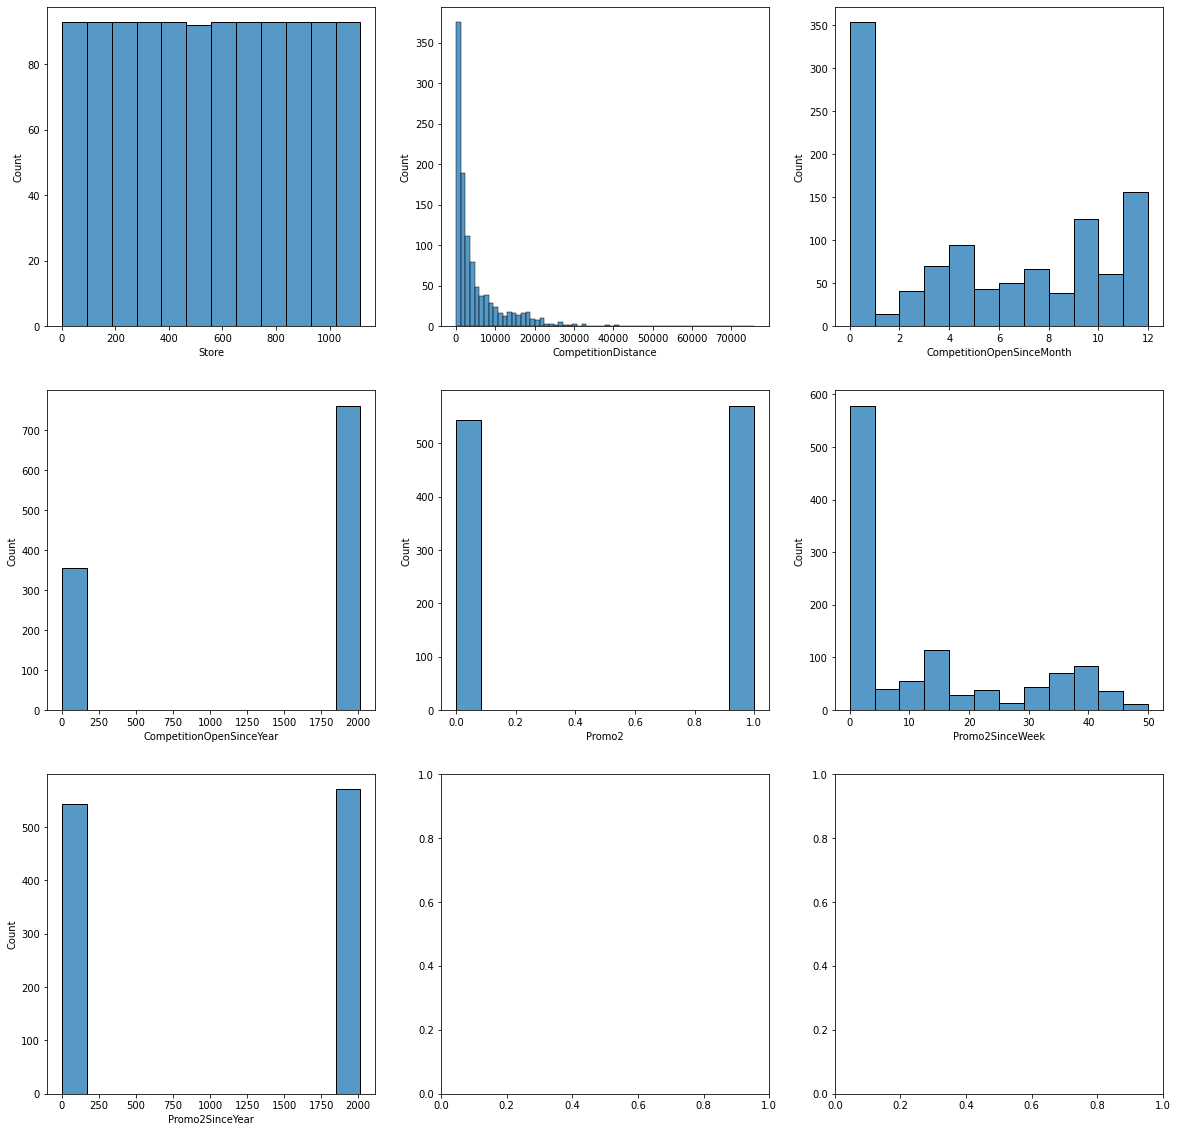

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,20))
for i,col in enumerate(store_df.describe().columns): 
 sns.histplot(store_df[col],ax=axes[i//3,i%3])


we could see
1. compition distance is skewed


**Now lets merge both the data frames to see some trend with sales**

In [ ]:
new_df=sales_df.merge(store_df,how='inner',left_on='Store',right_on='Store')

In [ ]:
new_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'date', 'month',
       'year', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

**Lets see some trends**

In [ ]:
new_df.groupby('StoreType')['Sales'].mean()

StoreType
a     6925.167661
b    10231.407505
c     6932.512755
d     6822.141881
Name: Sales, dtype: float64

**Sales** of store **type B** are much **higher**

only store type b is affecting sales much

In [ ]:
new_df.groupby('Assortment')['Sales'].mean()

Assortment
a    6621.017039
b    8639.346322
c    7300.526339
Name: Sales, dtype: float64

**with assortment sales are varying** nad max sales is with assortment b

In [ ]:
new_df.groupby('CompetitionOpenSinceYear')['Sales'].mean() 

CompetitionOpenSinceYear
0.0       6931.903372
1900.0    8395.837621
1961.0    7812.830552
1990.0    7168.054026
1994.0    7268.379510
1995.0    7458.760684
1998.0    7490.758486
1999.0    6742.708836
2000.0    7885.687459
2001.0    6438.930657
2002.0    6567.832031
2003.0    7027.490169
2004.0    6334.634688
2005.0    6854.351761
2006.0    6969.629463
2007.0    6598.008248
2008.0    6750.199562
2009.0    7199.429764
2010.0    6757.496184
2011.0    6765.439153
2012.0    6880.799154
2013.0    7749.229432
2014.0    7211.084237
2015.0    6707.520559
Name: Sales, dtype: float64

Remove the column CompetitionOpenSinceYear because the average sales of this columns is probably same ...........................................

In [ ]:
new_df.groupby('CompetitionOpenSinceMonth')['Sales'].mean() 

CompetitionOpenSinceMonth
0.0     6931.903372
1.0     7464.905701
2.0     6559.718144
3.0     7259.452615
4.0     6894.869879
5.0     7537.734587
6.0     7648.790037
7.0     6798.160134
8.0     7539.226094
9.0     6791.591115
10.0    6829.845837
11.0    6611.459119
12.0    6795.572180
Name: Sales, dtype: float64

In [ ]:
new_df.groupby('Promo2')['Sales'].mean()

Promo2
0    7350.557935
1    6558.386062
Name: Sales, dtype: float64

**Promo2 affecting sales negatively**

In [ ]:
new_df.groupby('PromoInterval')['Sales'].mean() 

PromoInterval
0                   7350.557935
Feb,May,Aug,Nov     6426.907994
Jan,Apr,Jul,Oct     6725.978932
Mar,Jun,Sept,Dec    6214.501209
Name: Sales, dtype: float64

Remove the Column name PromoInterval because the average sales of this columns is approximately same


In [ ]:
new_df.drop(columns=['PromoInterval'],axis=1,inplace=True)

**Lets to one hot encoding**

In [ ]:
#Lets do one hot encoding on column StoreType and convert to (0,1) 
new_df = pd.get_dummies(new_df, columns=["StoreType"],drop_first=True)

In [ ]:
# one hot encoding on Assortment
new_df=pd.get_dummies(new_df,columns=['Assortment'],drop_first=True)

lets see distribution of data

IndexError: ignored

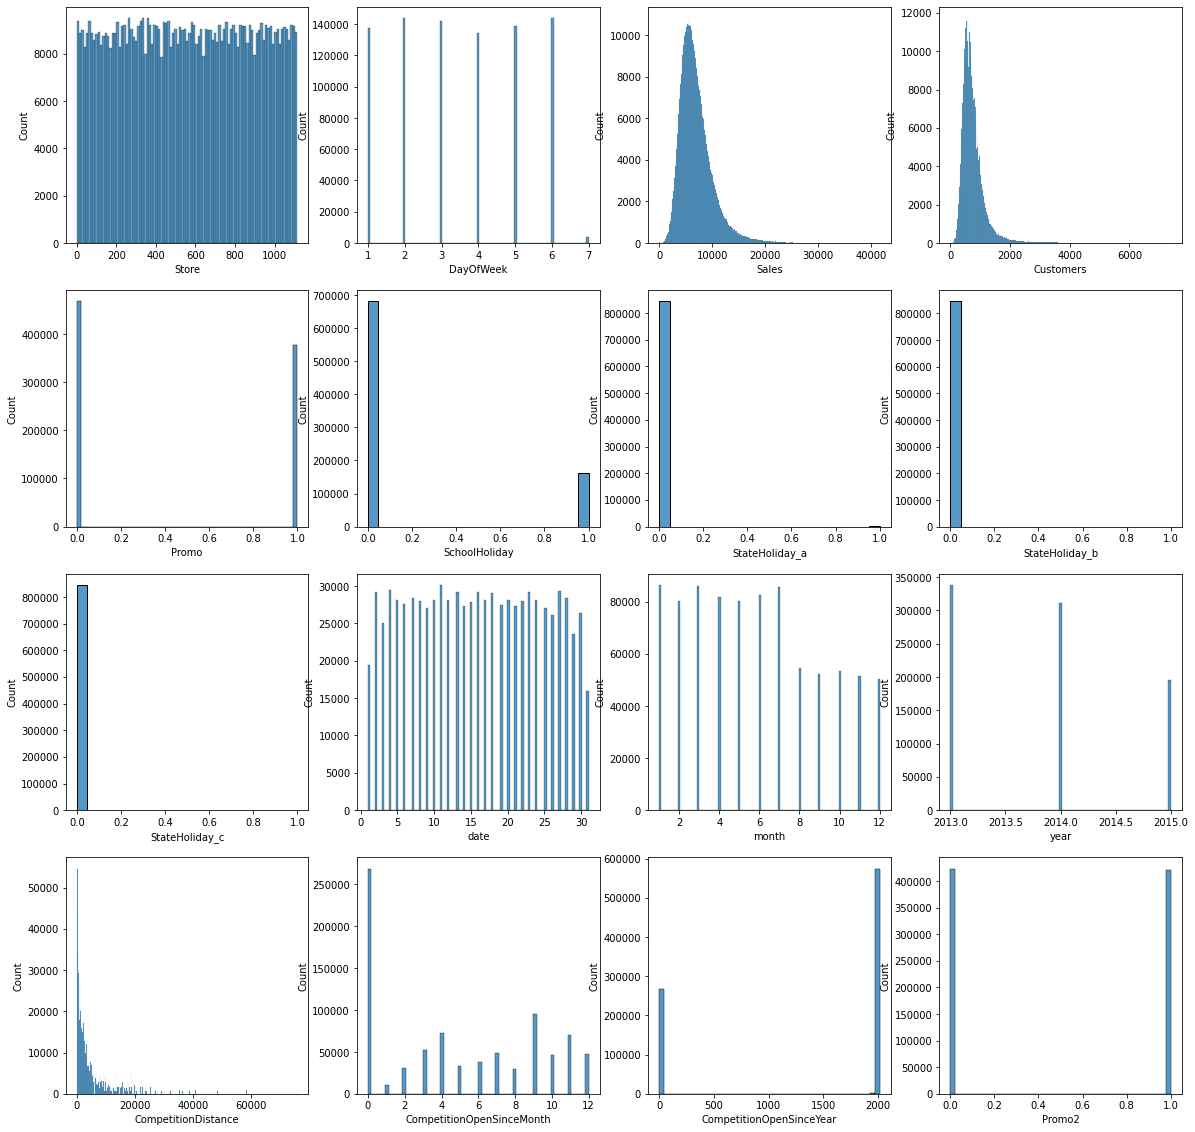

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(new_df.describe().columns): 
 sns.histplot(new_df[col],ax=axes[i//4,i%4])

lets see correlation matrix

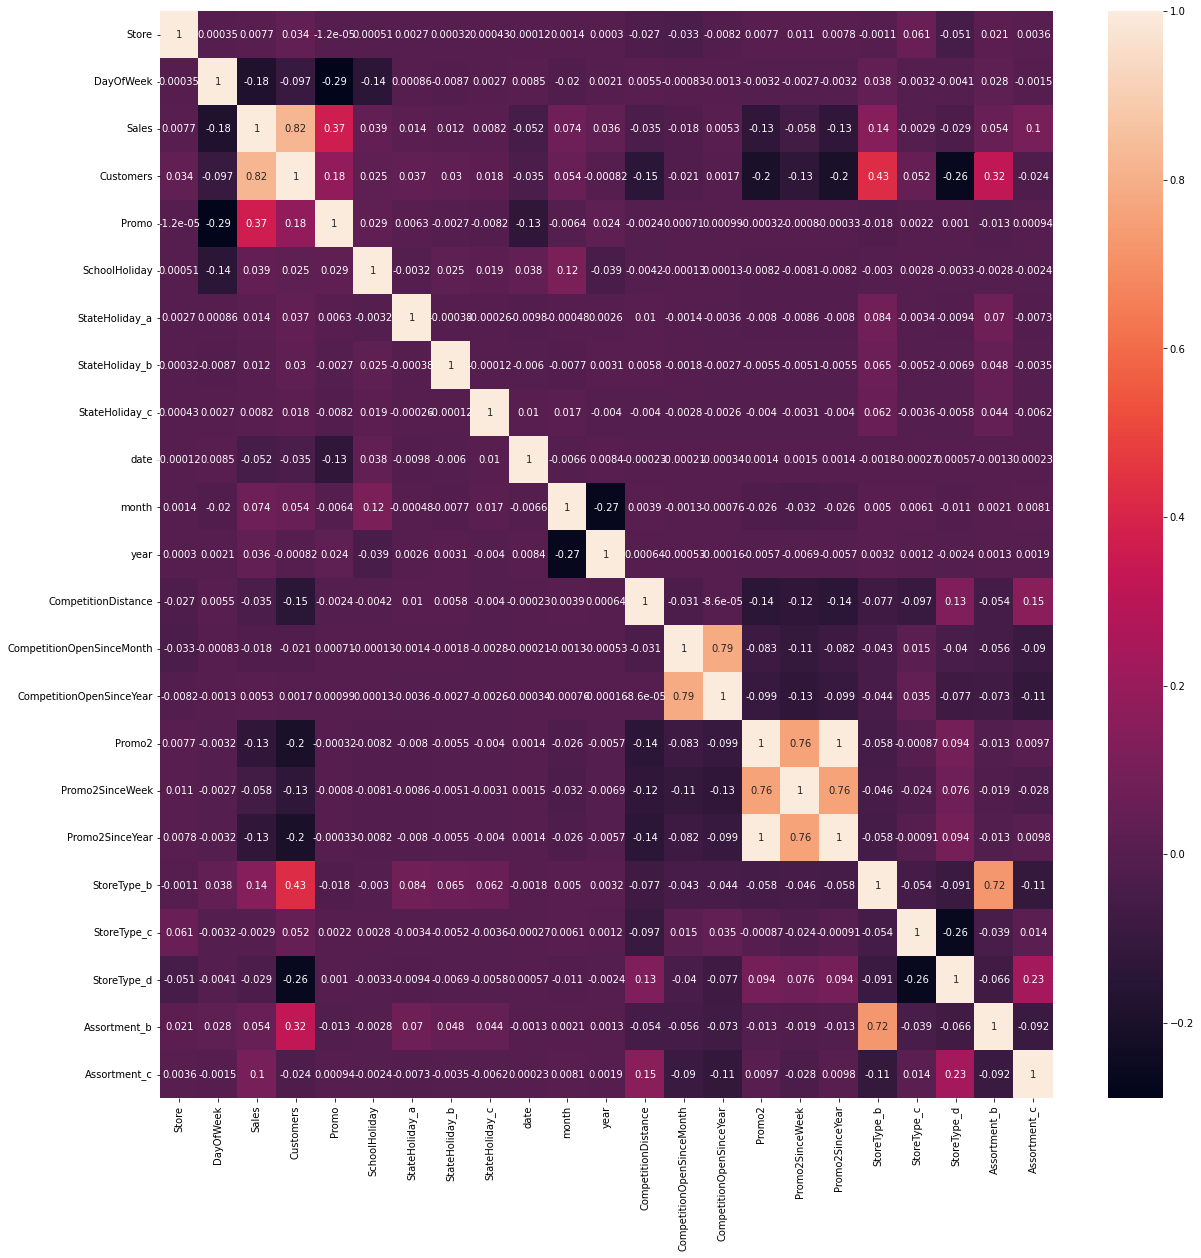

In [ ]:
correlations = new_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

**Compitionopensinceyear ,Stateholiday_C and Store(store_id) seems least correlated with sales**

In [ ]:
#lets remove competitionOpenSinceYear,
new_df.drop(columns=['CompetitionOpenSinceYear','StateHoliday_c','Store'],inplace=True)

**Customers column is highly corelated but we will not be having no of customers for future so need to drop this column**

In [ ]:
new_df.drop(columns=['Customers'],inplace=True)

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(20,20))
for i,col in enumerate(new_df.describe().columns):
 sns.scatterplot(new_df[col],new_df['Sales'],ax=axes[i//5,i%5])

Error in callback <function flush_figures at 0x7f64a122a290> (for post_execute):


KeyboardInterrupt: ignored

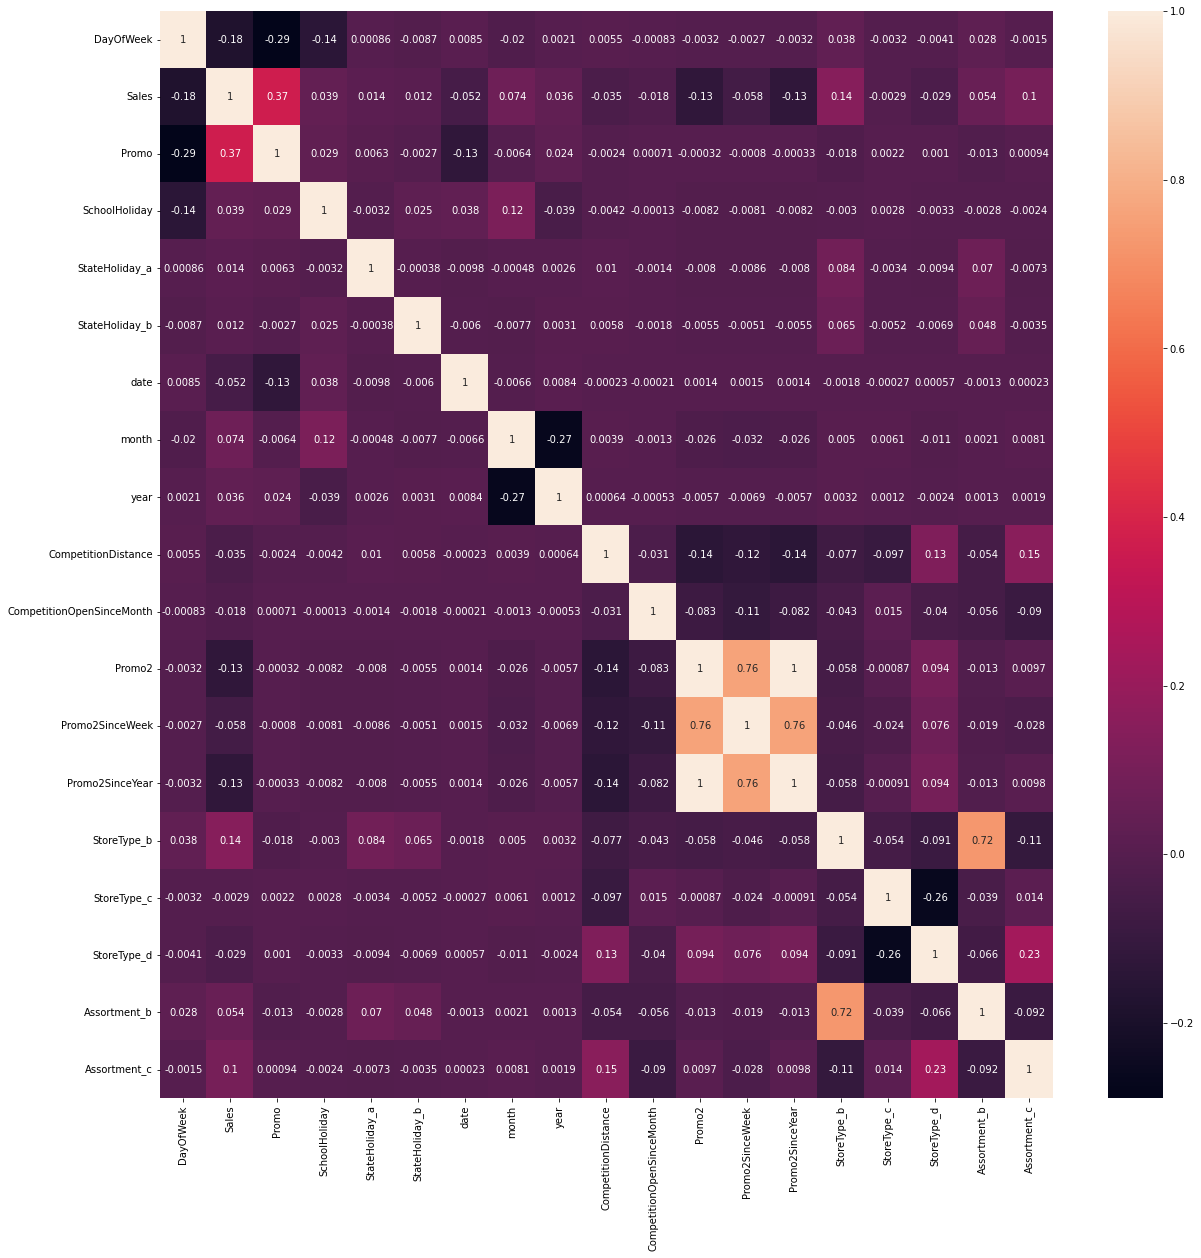

In [ ]:
correlations = new_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

Promo2 and Promo2SinceYear showing multicolinearity(1) so we can remove 1 column.

We will remove Promo2SinceYear

In [ ]:
new_df.drop(columns=['Promo2SinceYear'],inplace=True)

Now lets divide dependent var and independent var

In [ ]:
#storing dependent variables in 
y=new_df['Sales']

In [ ]:
#storing independent variables in X
new_df.drop(columns=['Sales'],axis=1,inplace=True)

In [ ]:
x=new_df

In [ ]:
x

,DayOfWeek,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,date,month,year,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,5,1,1,0,0,31,7,2015,1270.0,9.0,0,0.0,0,1,0,0,0
1,4,1,1,0,0,30,7,2015,1270.0,9.0,0,0.0,0,1,0,0,0
2,3,1,1,0,0,29,7,2015,1270.0,9.0,0,0.0,0,1,0,0,0
3,2,1,1,0,0,28,7,2015,1270.0,9.0,0,0.0,0,1,0,0,0
4,1,1,1,0,0,27,7,2015,1270.0,9.0,0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1,1,0,0,0,7,1,2013,1100.0,6.0,0,0.0,0,0,0,0,0
844388,6,0,0,0,0,5,1,2013,1100.0,6.0,0,0.0,0,0,0,0,0
844389,5,0,1,0,0,4,1,2013,1100.0,6.0,0,0.0,0,0,0,0,0
844390,4,0,1,0,0,3,1,2013,1100.0,6.0,0,0.0,0,0,0,0,0


Now lets split the data in training and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

**Now let us use some models and finds which model is fitting with data**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


**Fitting and transforming our data**

In [ ]:
transform=MinMaxScaler()
x_train=transform.fit_transform(x_train)
x_test=transform.transform(x_test)





**Let us implement Linear regression**


In [ ]:
Linear_regressor=LinearRegression()
Linear_regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=Linear_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print ('r2 score :' +str(r2_score(y_test,y_predict)))

r2 score :0.21096901407571245


In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import math
print('mean squared error')
math.sqrt(mean_squared_error(y_test,y_predict))

mean squared error


2750.8171177596555

In [ ]:
Linear_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
Linear_df

,Actual,Predicted
39735,4221,6272.975937
633476,2072,5966.891970
543857,8594,8431.709510
502433,10752,7438.655927
806512,3292,6276.538841
...,...,...
372462,8264,7656.938306
233568,6036,7181.926598
181652,2923,4785.089185
609342,11719,8015.449087


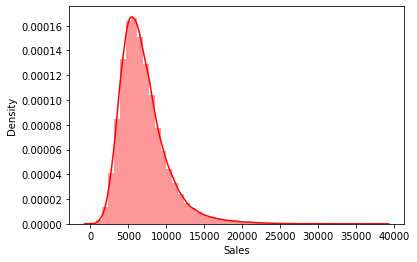

In [ ]:
sns.distplot((y_test),color='red')

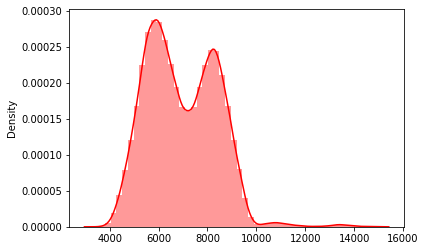

In [ ]:
sns.distplot((y_predict),color='red')

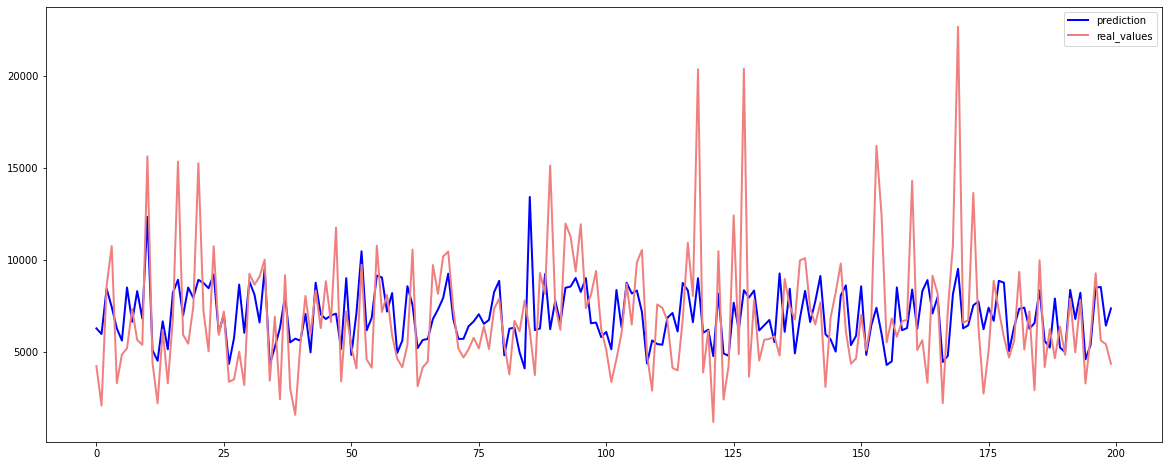

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(Linear_regressor.predict(x_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

**Decision Tree**

In [ ]:
# Define the regressor model by using the DecisionTreeRegressor class

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 44)

In [ ]:
# Then, we'll fit the model on train data 

regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=44)

In [ ]:
# use model to get a prediction

y_pred = regressor.predict(x_test)

In [ ]:
#check accuracy score
regressor.score(x_train, y_train)

0.9970735015558014

In [ ]:
# finding error

from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import sqrt

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error:  856.039877213427
Root Mean Squared Error:  1378.805781065069


In [ ]:
from sklearn.metrics import r2_score
print('R2 score : ' + str(r2_score(y_test,y_pred)))

R2 score : 0.8017666074277554


In [ ]:
predict_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predict_df

,Actual,Predicted
39735,4221,4356.0
633476,2072,2015.0
543857,8594,9065.0
502433,10752,11215.0
806512,3292,3448.0
...,...,...
372462,8264,9065.0
233568,6036,5487.0
181652,2923,2891.0
609342,11719,13147.0


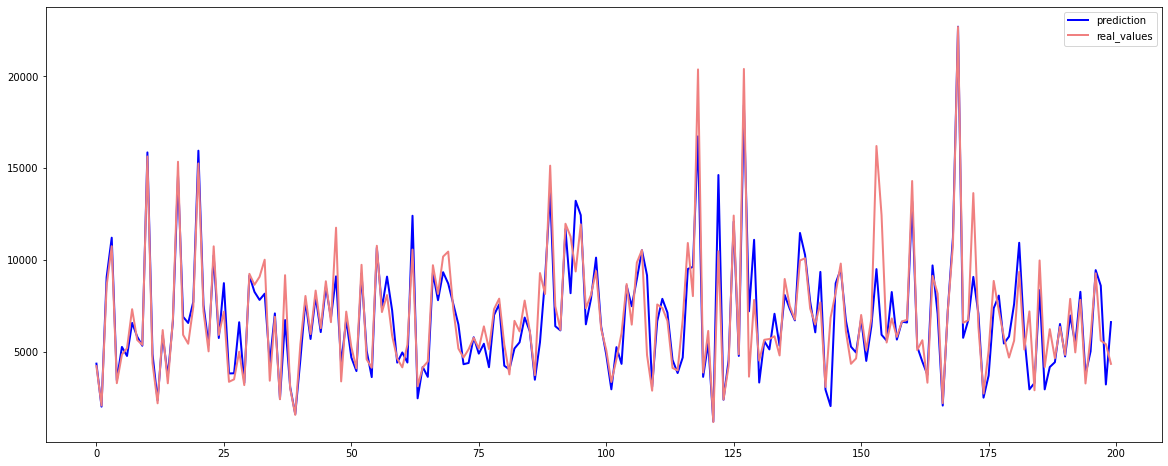

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(regressor.predict(x_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

#**xgboost**

In [ ]:
#Importing libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [ ]:
#Instantiation
model = xgb.XGBRegressor(objective ='reg:squarederror',random_state=42,n_estimators=1000,learning_rate=0.2, max_depth=8, subsample=0.8, colsample_bytree=0.7)

In [ ]:
# Fitting the model(xgboost)
model.fit(x_train, y_train)

In [ ]:
#Calculating the model accuracy
xgb_acc = model.score(x_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  94.2237899031698


In [ ]:
#Making predictions
y_pred = model.predict(x_test)

In [ ]:
#calculate metrics and print the results for test set

#Mean Absolute Error or MAE
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
#Mean Squared Error or MSE
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
#Root Mean Squared Error or RMSE
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#R2
print("R2" , metrics.explained_variance_score(y_test, y_pred))


MAE 497.3917571356228
MSE 553952.2862202997
RMSE 744.2797096658619
R2 0.942237904005351


In [ ]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
39735,4221,4669.377930
633476,2072,2068.063477
543857,8594,8462.949219
502433,10752,10928.881836
806512,3292,3861.112061
...,...,...
372462,8264,8910.322266
233568,6036,6388.890625
181652,2923,2771.103271
609342,11719,11010.794922


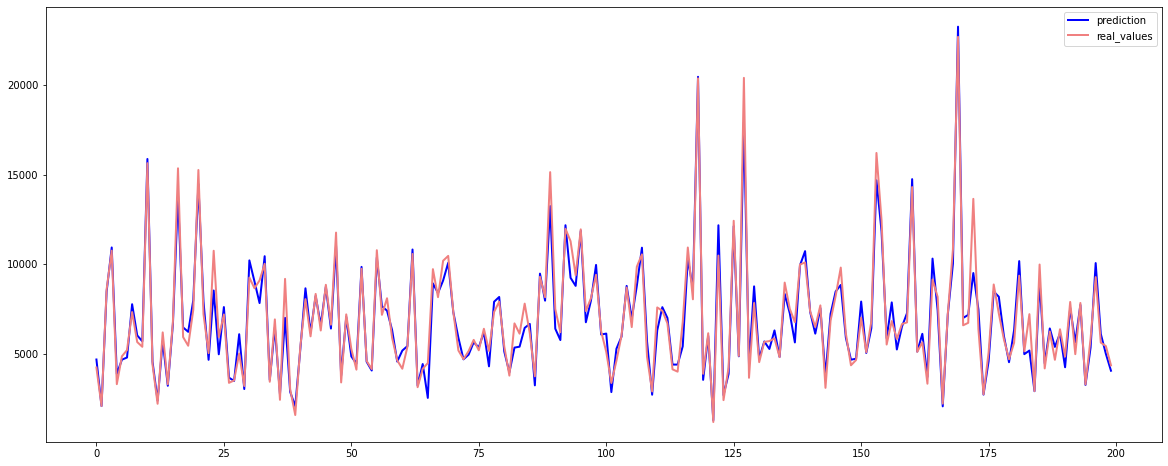

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(model.predict(x_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

**RandoForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    # Maximum depth of trees
    'max_depth': [80],
     # Minimum number of samples required at each leaf node
    'min_samples_leaf': [10],
    # Minimum number of samples required to split a node
    'min_samples_split': [20],
    # Number of trees
    'n_estimators': [300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=80, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time= 7.5min
[CV] END max_depth=80, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time= 6.7min
[CV] END max_depth=80, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time= 6.3min


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80], 'min_samples_leaf': [10],
                         'min_samples_split': [20], 'n_estimators': [300]},
             verbose=2)

In [ ]:
y_pred=grid_search.predict(x_test)

In [ ]:
#check accuracy score
grid_search.score(x_train, y_train)

0.8945691889339075

In [ ]:
grid_search.score(x_test, y_pred)

0.8347606006873078

In [ ]:
# finding error

from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import sqrt

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  704.3839797356239
Root Mean Squared Error:  1132.55339638993


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8662517846224456

In [ ]:
random_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
random_df

,Actual,Predicted
39735,4221,4434.696270
633476,2072,2421.627717
543857,8594,8867.291049
502433,10752,10724.386621
806512,3292,3665.647843
...,...,...
372462,8264,9058.471731
233568,6036,6028.635413
181652,2923,2685.621517
609342,11719,10684.680437


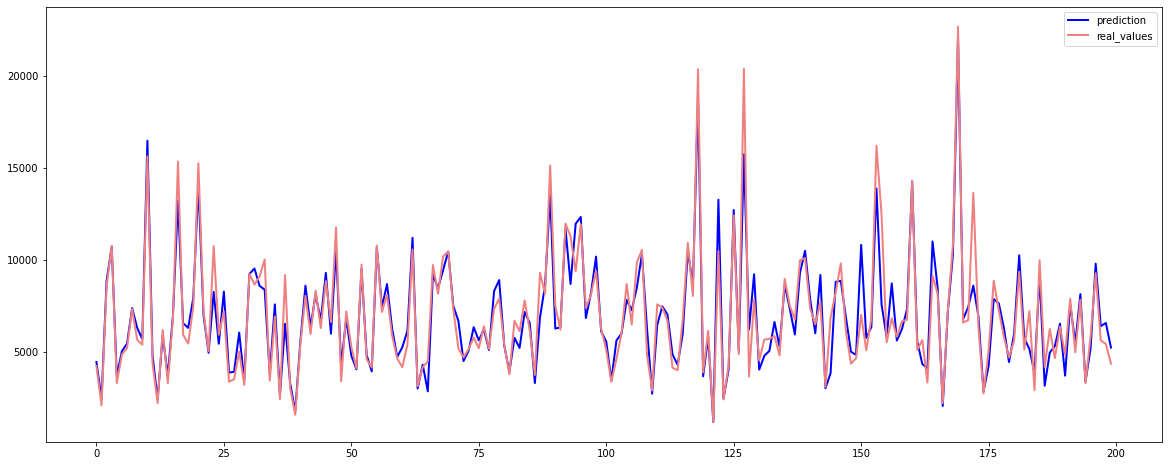

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(grid_search.predict(x_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

**We will take XGBOOST as our modal because it is giving least arror and best r2 score**

**Modal Explainibility**

In [ ]:
pip install eli5

In [ ]:
import eli5 as eli

In [ ]:
eli.explain_weights(model)

Weight,Feature
0.1896,f12
0.1576,f1
0.1106,f8
0.0768,f9
0.0757,f10
0.0652,f16
0.0568,f13
0.0541,f11
0.0457,f14
0.0443,f15


In [ ]:
new_df.columns

Index(['DayOfWeek', 'Promo', 'SchoolHoliday', 'StateHoliday_a',
       'StateHoliday_b', 'date', 'month', 'year', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceWeek', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')